<a href="https://colab.research.google.com/github/SwatiBGupta1110/ML_TreeAlgorithms/blob/main/RandomForest/Credit_Card_FraudDetection_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Credit Card Fraud Detection: 

This problem statement is about credit card data fraud detection.

Data Description:


1. ID: Bank Accoiunt Number 
2. LIMIT_BAL:is a maximum credit card limit.
3. SEX: is a Gender of credit card holder
4. EDUCATION: highest qualification(Label Encoded)
5. MARRIAGE: Marital status of credit card holder.(Label Encoded)
6. AGE: Age of credit card holder.
7. PAY_0-6 : Payments done.
8. BILL_AMT1-6: Billed amount against those payments.
9. PAY_AMT1-6: Payment done against those payments.
10. defaulted : Target Variable to predict whether the customer is going to  default on his payments thus leading to a fraud.

1 denotes defaulted case when person is not able to pay the credit card bill.
0 denotes non-defaulted case when person paid the credit card bill.


1. Perform EDA
2. Remove Uninformative features
  
  **The problem is a binary classification. Hence you are entitled to model multiple classifiers.**

  1. Logistic Regression :L1(Lasso) and L2(Ridge) Regularization
  2. Decision Tree : Compare Base Classifier with Hypertuned classifier
  3. Random Forest: Compare Base Classifier with Hypertuned classifier

  You may tackle the following issues in the data.
  1. Missing values 
  2. Outliers
  3. Data Imbalance w.r.t target variable 
    a. Implement SMOTE-Try Undersampling and Oversampling

  Metrics:
  The model performance is evaluated on -
  1.F1 Score
  2.Precision and Recall
  3.Plot AUC ROC Curve for each classifier-Understand AUC_ROC Curve.

  Finally, Which variables are the top 5 predictor variables.



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv("/content/sample_data/credit-card-default.csv")

In [51]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  defaulted
0   1      20000    2          2  ...         0         0         0          1
1   2     120000    2          2  ...      1000         0      2000          1
2   3      90000    2          2  ...      1000      1000      5000          0
3   4      50000    2          2  ...      1100      1069      1000          0
4   5      50000    1          2  ...      9000       689       679          0

[5 rows x 25 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [53]:
data.describe()

ID       LIMIT_BAL  ...       PAY_AMT6     defaulted
count  30000.000000    30000.000000  ...   30000.000000  30000.000000
mean   15000.500000   167484.322667  ...    5215.502567      0.221200
std     8660.398374   129747.661567  ...   17777.465775      0.415062
min        1.000000    10000.000000  ...       0.000000      0.000000
25%     7500.750000    50000.000000  ...     117.750000      0.000000
50%    15000.500000   140000.000000  ...    1500.000000      0.000000
75%    22500.250000   240000.000000  ...    4000.000000      0.000000
max    30000.000000  1000000.000000  ...  528666.000000      1.000000

[8 rows x 25 columns]

In [54]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [55]:
data.drop(columns=["ID"], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


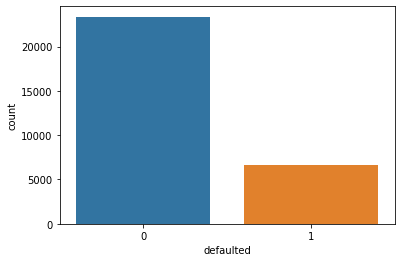

In [56]:
sns.countplot(data["defaulted"])

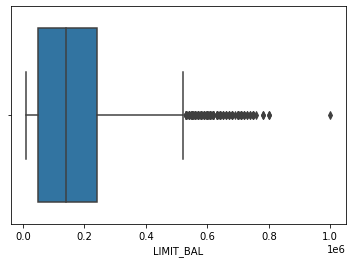

In [57]:
sns.boxplot(x="LIMIT_BAL",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


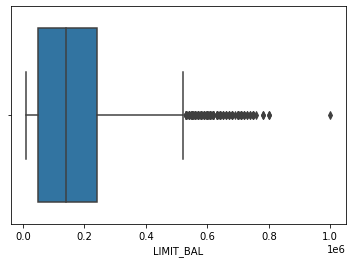

In [58]:
sns.boxplot(data["LIMIT_BAL"])

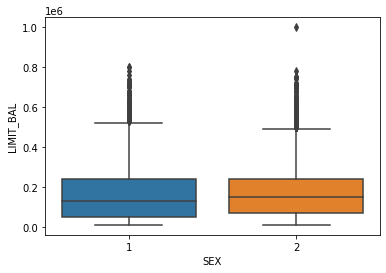

In [59]:
sns.boxplot(y="LIMIT_BAL",x="SEX",data=data)

In [60]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

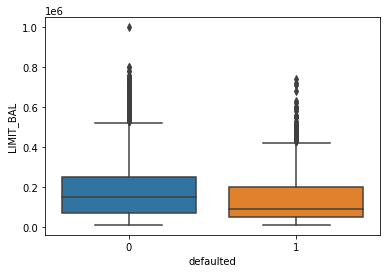

In [61]:
sns.boxplot(x="defaulted",y="LIMIT_BAL",data=data)

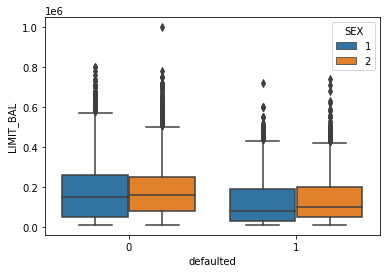

In [62]:
sns.boxplot(x="defaulted",y="LIMIT_BAL",data=data,hue="SEX")

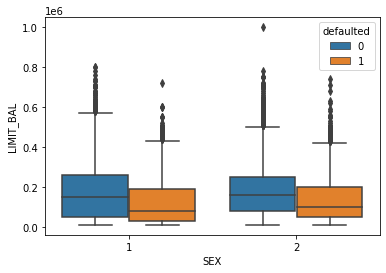

In [63]:
sns.boxplot(hue="defaulted",y="LIMIT_BAL",data=data,x="SEX")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


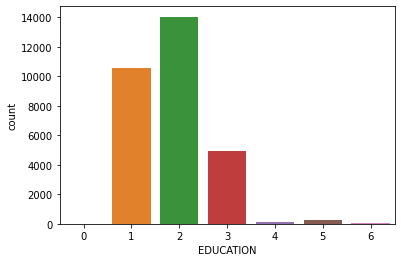

In [64]:
sns.countplot(data["EDUCATION"])

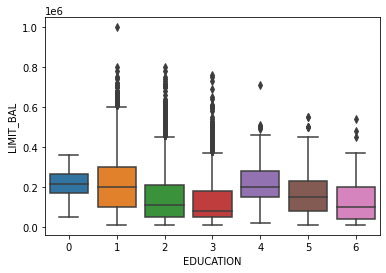

In [65]:
sns.boxplot(x="EDUCATION",y="LIMIT_BAL",data=data)

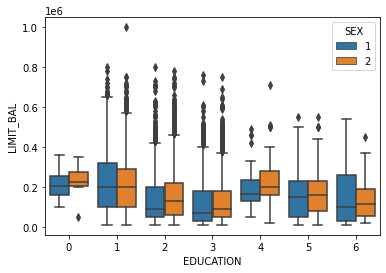

In [66]:
sns.boxplot(x="EDUCATION",y="LIMIT_BAL",data=data,hue="SEX")

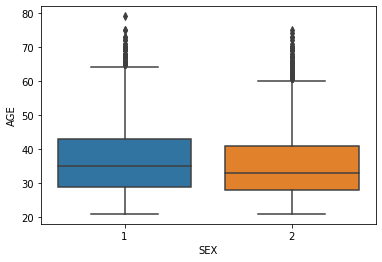

In [67]:
sns.boxplot(y="AGE",x="SEX",data=data)

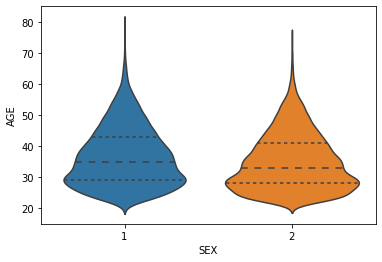

In [68]:
sns.violinplot(y="AGE",x="SEX",data=data,inner="quartile")

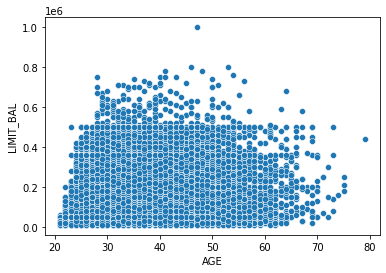

In [69]:
sns.scatterplot(y="LIMIT_BAL",x="AGE",data=data)

In [70]:
# default pearson : standard correlation coefficient
print("Pearson")
print(data[["LIMIT_BAL","AGE"]].corr())
print("-----\n")

#spearman : Spearman rank correlation
print("Spearman RAnk")
print(data[["LIMIT_BAL","AGE"]].corr(method='spearman'))
print("-----\n")

#kendall : Kendall Tau correlation coefficient
print("Kendall")
print(data[["LIMIT_BAL","AGE"]].corr(method='kendall'))


Pearson
           LIMIT_BAL       AGE
LIMIT_BAL   1.000000  0.144713
AGE         0.144713  1.000000
-----

Spearman RAnk
           LIMIT_BAL       AGE
LIMIT_BAL   1.000000  0.186485
AGE         0.186485  1.000000
-----

Kendall
           LIMIT_BAL      AGE
LIMIT_BAL    1.00000  0.13472
AGE          0.13472  1.00000


In [71]:
def correlation(f1,f2):
  print("Pearson")
  print(data[[f1,f2]].corr())
  print("-----\n")

  #spearman : Spearman rank correlation
  print("Spearman Rank")
  print(data[[f1,f2]].corr(method='spearman'))
  print("-----\n")

  #kendall : Kendall Tau correlation coefficient
  print("Kendall")
  print(data[[f1,f2]].corr(method='kendall'))


In [72]:
correlation("defaulted","LIMIT_BAL")

Pearson
           defaulted  LIMIT_BAL
defaulted    1.00000   -0.15352
LIMIT_BAL   -0.15352    1.00000
-----

Spearman Rank
           defaulted  LIMIT_BAL
defaulted   1.000000  -0.169586
LIMIT_BAL  -0.169586   1.000000
-----

Kendall
           defaulted  LIMIT_BAL
defaulted   1.000000  -0.141088
LIMIT_BAL  -0.141088   1.000000


In [73]:
correlation("defaulted","SEX")

Pearson
           defaulted       SEX
defaulted   1.000000 -0.039961
SEX        -0.039961  1.000000
-----

Spearman Rank
           defaulted       SEX
defaulted   1.000000 -0.039961
SEX        -0.039961  1.000000
-----

Kendall
           defaulted       SEX
defaulted   1.000000 -0.039961
SEX        -0.039961  1.000000


In [74]:
correlation("defaulted","EDUCATION")

Pearson
           defaulted  EDUCATION
defaulted   1.000000   0.028006
EDUCATION   0.028006   1.000000
-----

Spearman Rank
           defaulted  EDUCATION
defaulted   1.000000   0.044369
EDUCATION   0.044369   1.000000
-----

Kendall
           defaulted  EDUCATION
defaulted    1.00000    0.04207
EDUCATION    0.04207    1.00000


In [75]:
correlation("defaulted","MARRIAGE")

Pearson
           defaulted  MARRIAGE
defaulted   1.000000 -0.024339
MARRIAGE   -0.024339  1.000000
-----

Spearman Rank
           defaulted  MARRIAGE
defaulted    1.00000  -0.02649
MARRIAGE    -0.02649   1.00000
-----

Kendall
           defaulted  MARRIAGE
defaulted    1.00000  -0.02633
MARRIAGE    -0.02633   1.00000


In [76]:
correlation("defaulted","AGE")

Pearson
           defaulted      AGE
defaulted    1.00000  0.01389
AGE          0.01389  1.00000
-----

Spearman Rank
           defaulted       AGE
defaulted   1.000000  0.005149
AGE         0.005149  1.000000
-----

Kendall
           defaulted       AGE
defaulted   1.000000  0.004273
AGE         0.004273  1.000000


<Figure size 720x720 with 0 Axes>

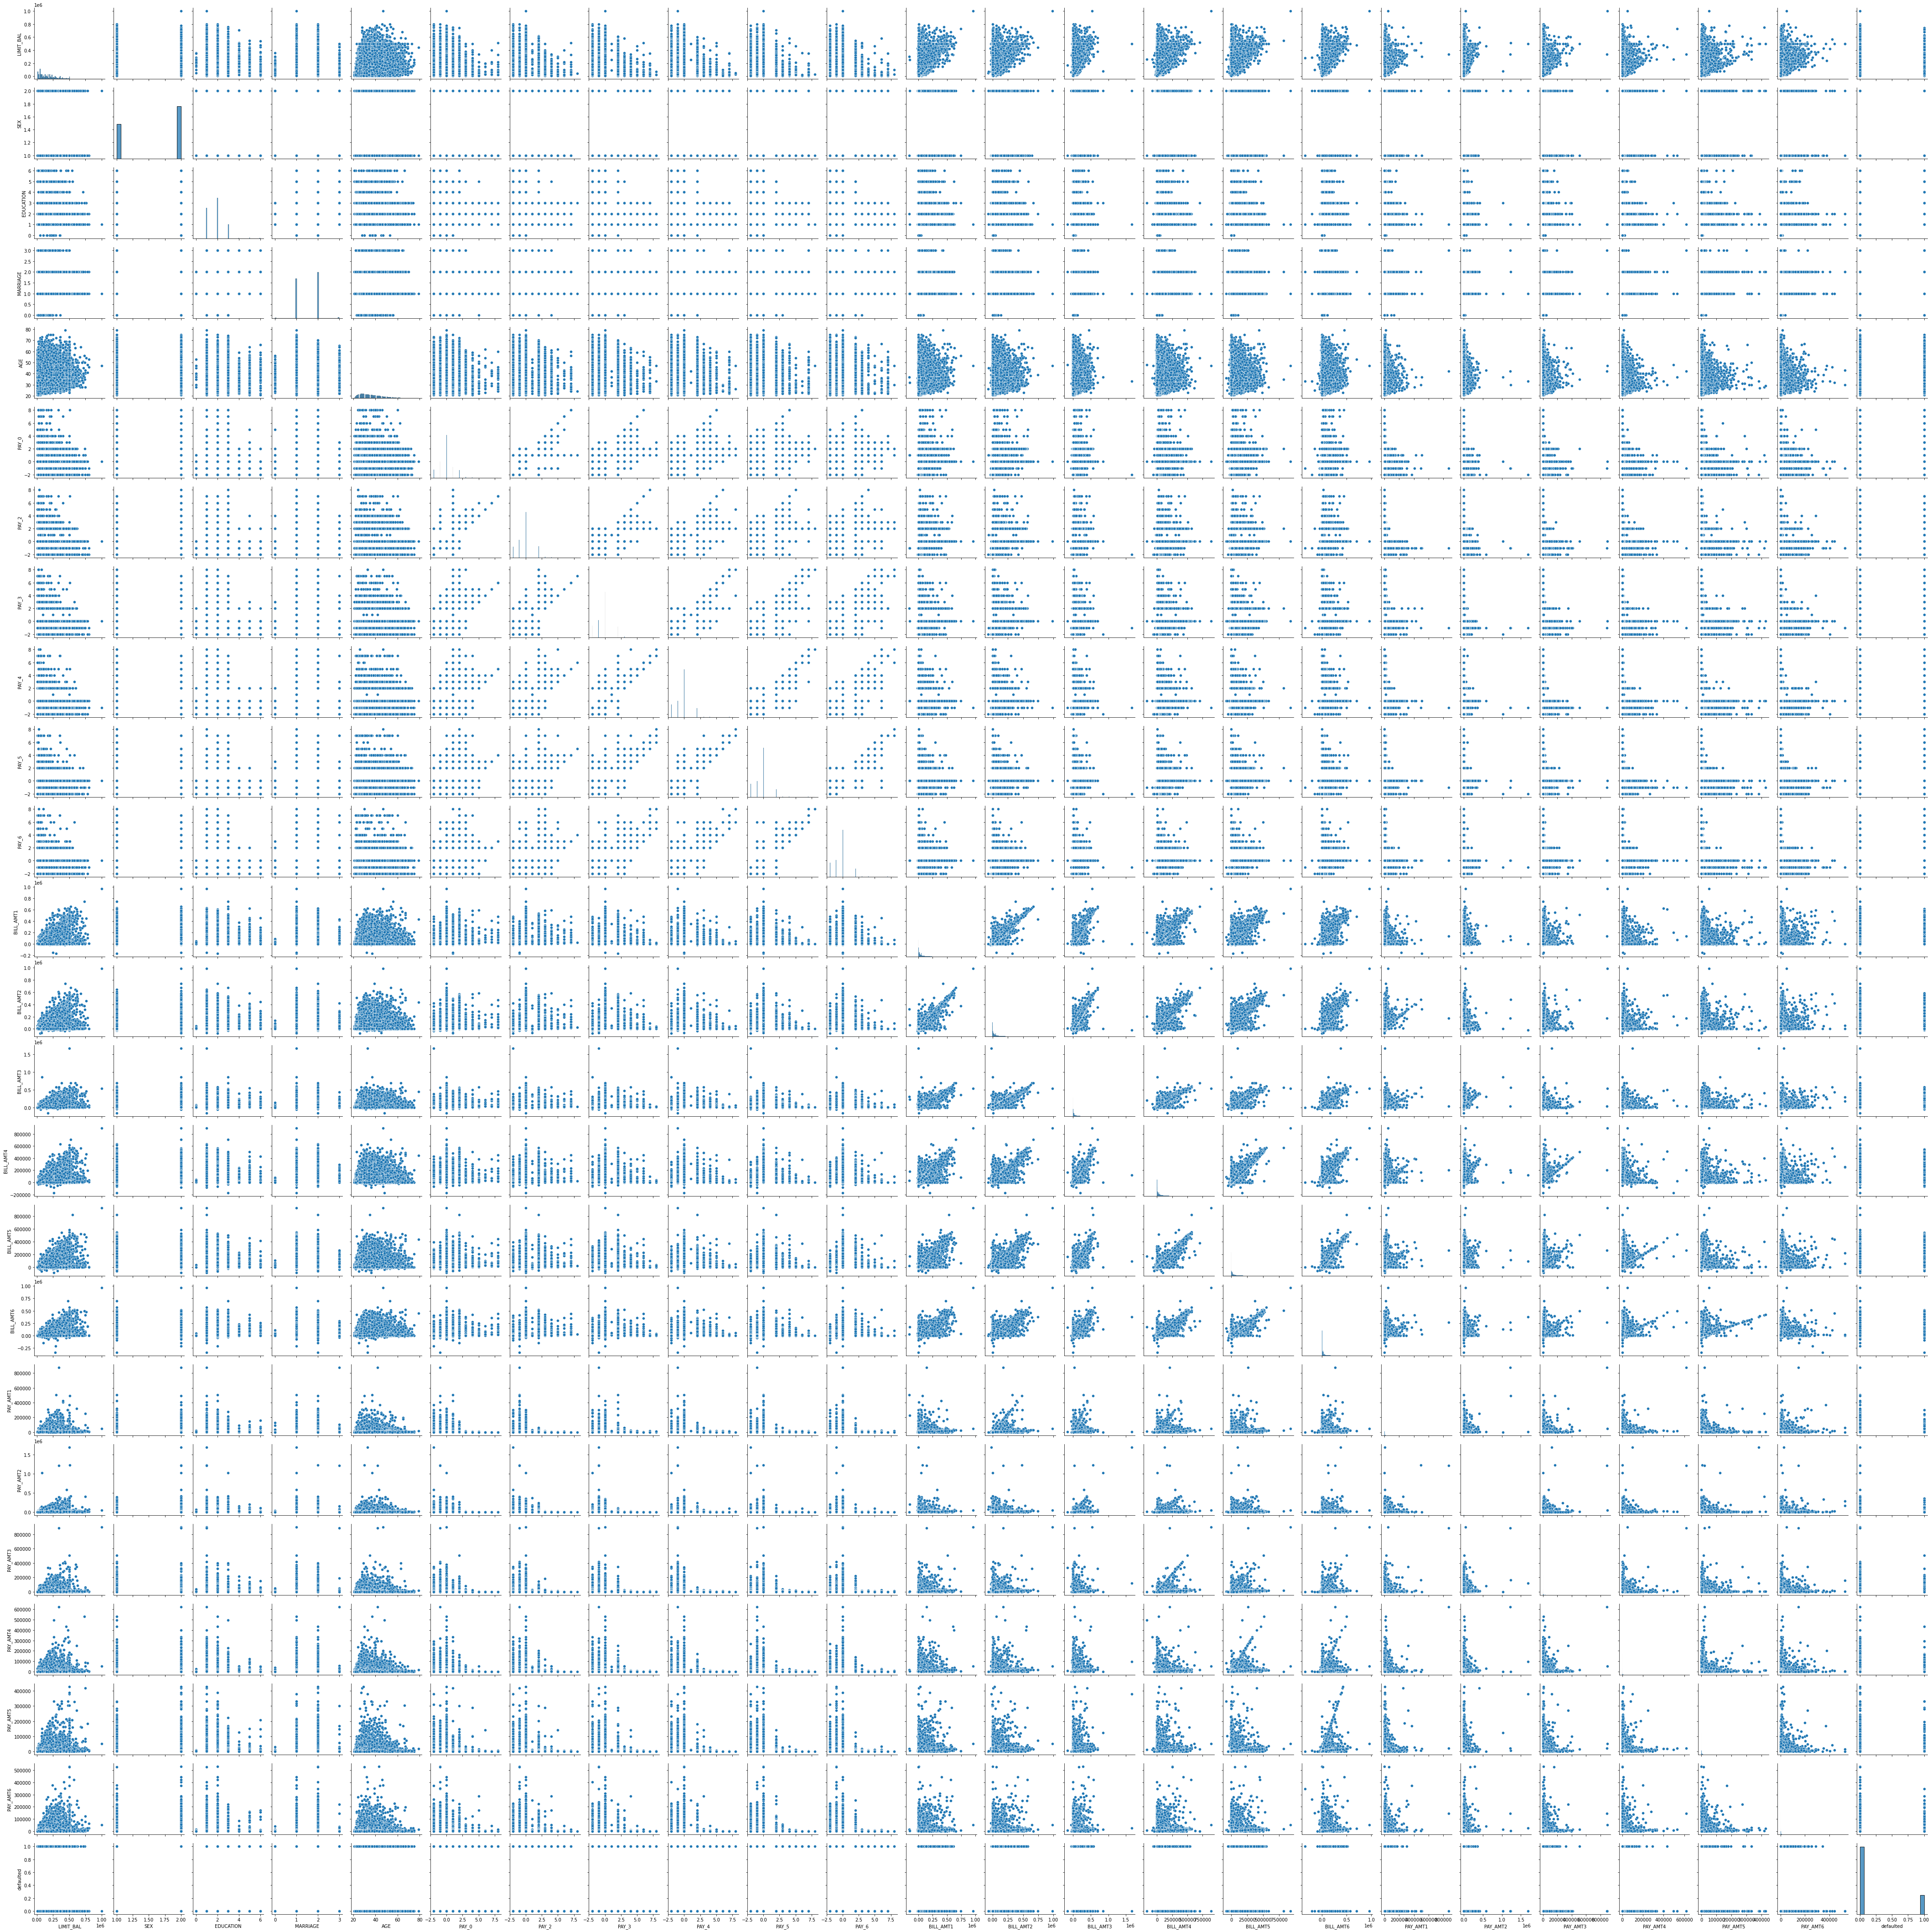

In [77]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)
plt.show()

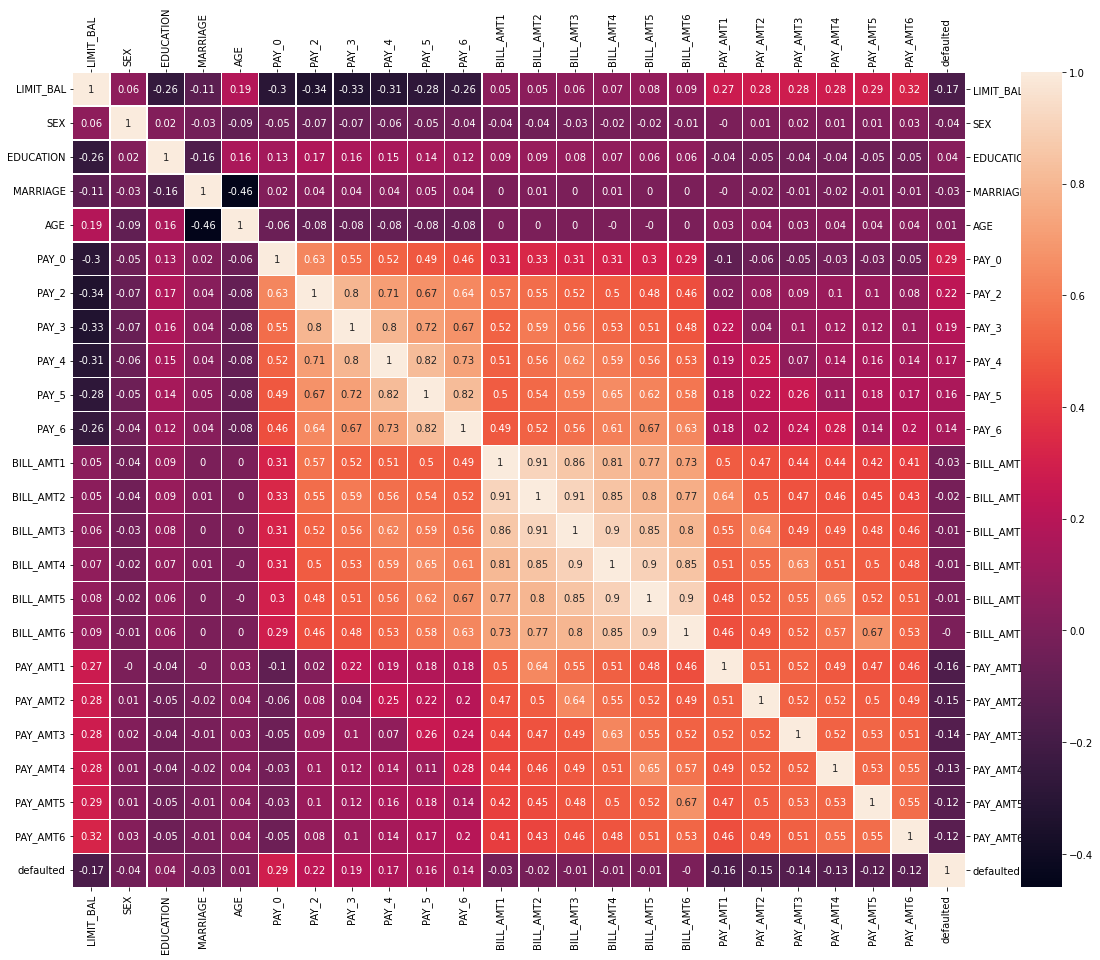

In [78]:
plt.figure(figsize=(20,15))
hmap=sns.heatmap(data=round(data.corr(method="spearman"),2) ,annot=True,linewidths=.5)  # Default Pearson
hmap.tick_params(right=True, top=True, labelright=True, labeltop=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

#Let's apply Logistic Regression


In [79]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [80]:
logistic_model=LogisticRegression()      # default='l2' Ridge Regularization -->  add a L2 penalty term 

#Lambda(Statistically) /Alpha (programmatically) is Regularization Parameter and sklearn Logistic Regression Package it is denoted as C.

In [81]:
logistic_data=data.copy()

In [82]:
X=logistic_data.drop(columns=["defaulted"])
y=logistic_data["defaulted"]

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(21000, 23) (9000, 23) (21000,) (9000,)


In [84]:
columns=X_train.columns

In [85]:
#Using Normalization MinMax(0 to 1) 
# X_normal= (X_i- X_min)/(X_max-X_min) where i is from 0 to n records

min_max_scaler=MinMaxScaler()
X_train_min_max_scaler=min_max_scaler.fit_transform(X_train)

In [86]:
X_train_min_max_scaler=pd.DataFrame(X_train_min_max_scaler,columns=columns)

In [87]:
X_test_min_max_scaler=min_max_scaler.transform(X_test)
X_test_min_max_scaler=pd.DataFrame(X_test_min_max_scaler,columns=columns)

In [88]:
#Fit the data to Logistic regression model
logistic_model.fit(X_train_min_max_scaler,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [89]:
y_train_pred_logistic_mms=logistic_model.predict(X_train_min_max_scaler)
y_test_pred_logistic_mms=logistic_model.predict(X_test_min_max_scaler)

In [90]:
y_train_pred_logistic_mms_probabilities=logistic_model.predict_proba(X_train_min_max_scaler)

In [91]:
y_train_pred_logistic_mms_probabilities # Based on the Higher probaility model assigns values 0 or 1 in predict

array([[0.94072662, 0.05927338],
       [0.89031353, 0.10968647],
       [0.40228187, 0.59771813],
       ...,
       [0.93929186, 0.06070814],
       [0.80370588, 0.19629412],
       [0.94616201, 0.05383799]])

In [92]:
def evaluationMetrics(y_train,y_train_pred,y_test,y_test_pred):
  """ 
  There are four ways to check if the predictions are right or wrong:
  TN / True Negative: the case was negative and predicted negative
  TP / True Positive: the case was positive and predicted positive
  FN / False Negative: the case was positive but predicted negative
  FP / False Positive: the case was negative but predicted positive


  Precision — What percent of your predictions were correct?
  Precision:- Accuracy of positive predictions.
  Precison tells how many records where correctly classified(positive) out of all Vs total positive in addition to wrongly labeled records.
  precision= TP/(TP+FP)

  Recall tells how many records where corectly classified(positive) out of all Vs total positive in addition to missed out wrong labelled records.
  Recall:- Fraction of positives that were correctly identified.
  recall=TP/(TP+FN)
  Note: recall=TPR=sensitivity

  Recall — What percent of the positive cases did you catch?
  F1 score — What percent of positive predictions were correct?
  The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
  F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 
  As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
  F1 Score = 2*(Recall * Precision) / (Recall + Precision)

  support gives us the count of records that were considered in each class.

  """


  print("Evaulating Train Dataset:  ")
  print(confusion_matrix(y_true=y_train,y_pred=y_train_pred))
  print("Accuracy score: ",round(accuracy_score(y_true=y_train,y_pred=y_train_pred)*100,2))
  print("Classification report: \n",classification_report(y_train,y_train_pred))
  print("**********************************************************************")

  print("Evaulating Test Dataset:  ")
  print(confusion_matrix(y_true=y_test,y_pred=y_test_pred))
  print("Accuracy score: ",round(accuracy_score(y_true=y_test,y_pred=y_test_pred)*100,2))
  print("Classification report: \n",classification_report(y_test,y_test_pred))


In [93]:
evaluationMetrics(y_train,y_train_pred_logistic_mms,y_test,y_test_pred_logistic_mms)

Evaulating Train Dataset:  
[[15890   434]
 [ 3554  1122]]
Accuracy score:  81.01
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     16324
           1       0.72      0.24      0.36      4676

    accuracy                           0.81     21000
   macro avg       0.77      0.61      0.62     21000
weighted avg       0.80      0.81      0.77     21000

**********************************************************************
Evaulating Test Dataset:  
[[6835  205]
 [1520  440]]
Accuracy score:  80.83
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.22      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



#Implement Lasso (L1 Regularization) with Logistic Regression 

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
logistic_model_l1= LogisticRegression(penalty="l1",random_state=42,C=1,solver='liblinear')

In [103]:
y_train_pred_logistic_mms_l1=logistic_model_l1.fit(X_train_min_max_scaler,y_train)

In [104]:
y_train_pred_logistic_mms_l1=logistic_model_l1.predict(X_train_min_max_scaler)
y_test_pred_logistic_mms_l1=logistic_model_l1.predict(X_test_min_max_scaler)

In [105]:
evaluationMetrics(y_train,y_train_pred_logistic_mms_l1,y_test,y_test_pred_logistic_mms_l1)

Evaulating Train Dataset:  
[[15884   440]
 [ 3516  1160]]
Accuracy score:  81.16
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     16324
           1       0.72      0.25      0.37      4676

    accuracy                           0.81     21000
   macro avg       0.77      0.61      0.63     21000
weighted avg       0.80      0.81      0.77     21000

**********************************************************************
Evaulating Test Dataset:  
[[6832  208]
 [1511  449]]
Accuracy score:  80.9
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



##Implementing Decision Tree with Grid Search CV

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
DecisionTree_model=DecisionTreeClassifier()

In [108]:
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
y_train_pred_DecisionTree=DecisionTree_model.predict(X_train)
y_test_pred_DecisionTree=DecisionTree_model.predict(X_test)

In [111]:
evaluationMetrics(y_train,y_train_pred_DecisionTree,y_test,y_test_pred_DecisionTree)

Evaulating Train Dataset:  
[[16324     0]
 [   10  4666]]
Accuracy score:  99.95
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

**********************************************************************
Evaulating Test Dataset:  
[[5734 1306]
 [1149  811]]
Accuracy score:  72.72
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.41      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.74      0.73      0.73      9000



In [112]:
DecisionTree_model_entropy=DecisionTreeClassifier(criterion="entropy")

In [113]:
DecisionTree_model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [114]:
y_train_pred_DecisionTree_model_entropy=DecisionTree_model_entropy.predict(X_train)
y_test_pred_DecisionTree_model_entropy=DecisionTree_model_entropy.predict(X_test)

In [115]:
evaluationMetrics(y_train,y_train_pred_DecisionTree_model_entropy,y_test,y_test_pred_DecisionTree_model_entropy)

Evaulating Train Dataset:  
[[16324     0]
 [   10  4666]]
Accuracy score:  99.95
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

**********************************************************************
Evaulating Test Dataset:  
[[5762 1278]
 [1149  811]]
Accuracy score:  73.03
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7040
           1       0.39      0.41      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000



In [129]:
folds=2
params={"min_samples_leaf":[10,20,30], "max_features": [5,10,15,20,23], "max_depth": [2,4,6,8,9,10]}

In [130]:
X_train.shape

(21000, 23)

In [131]:
from sklearn.model_selection import GridSearchCV

In [139]:
model_cv=GridSearchCV(estimator=DecisionTreeClassifier(criterion="gini"),
                      param_grid=params,
                      scoring="precision",
                      cv=folds,return_train_score=True,verbose=1)

In [141]:
model_cv.fit(X_train,y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 9, 10],
                         'max_features': [5, 10, 15, 20, 23],
                         'min_samples_leaf': [10, 20, 30]},
             return_train_score=True, scoring='precision', verbose=1)

In [142]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results["Differnce"]=abs(cv_results["mean_train_score"]-cv_results["mean_test_score"])
cv_results[["params","mean_train_score","mean_test_score","Differnce"]].sort_values(by="Differnce")

params  ...  Differnce
4   {'max_depth': 2, 'max_features': 10, 'min_samp...  ...   0.000094
0   {'max_depth': 2, 'max_features': 5, 'min_sampl...  ...   0.000673
6   {'max_depth': 2, 'max_features': 15, 'min_samp...  ...   0.000877
11  {'max_depth': 2, 'max_features': 20, 'min_samp...  ...   0.001781
7   {'max_depth': 2, 'max_features': 15, 'min_samp...  ...   0.001781
..                                                ...  ...        ...
78  {'max_depth': 10, 'max_features': 10, 'min_sam...  ...   0.149203
63  {'max_depth': 9, 'max_features': 10, 'min_samp...  ...   0.149694
84  {'max_depth': 10, 'max_features': 20, 'min_sam...  ...   0.150749
87  {'max_depth': 10, 'max_features': 23, 'min_sam...  ...   0.166369
81  {'max_depth': 10, 'max_features': 15, 'min_sam...  ...   0.166612

[90 rows x 4 columns]

In [144]:
cv_results["params"].loc[4]

{'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 20}

In [145]:
DecisionTree_model_hypertuned=DecisionTreeClassifier(criterion="entropy",max_depth= 2, max_features= 10, min_samples_leaf= 20)

In [146]:
DecisionTree_model_hypertuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=10,
                       min_samples_leaf=20)

In [147]:
y_train_pred_DecisionTree_model_hypertuned=DecisionTree_model_hypertuned.predict(X_train)
y_test_pred_DecisionTree_model_hypertuned=DecisionTree_model_hypertuned.predict(X_test)

In [148]:
evaluationMetrics(y_train,y_train_pred_DecisionTree_model_hypertuned,y_test,y_test_pred_DecisionTree_model_hypertuned)

Evaulating Train Dataset:  
[[16117   207]
 [ 4000   676]]
Accuracy score:  79.97
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.99      0.88     16324
           1       0.77      0.14      0.24      4676

    accuracy                           0.80     21000
   macro avg       0.78      0.57      0.56     21000
weighted avg       0.79      0.80      0.74     21000

**********************************************************************
Evaulating Test Dataset:  
[[6955   85]
 [1679  281]]
Accuracy score:  80.4
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      7040
           1       0.77      0.14      0.24      1960

    accuracy                           0.80      9000
   macro avg       0.79      0.57      0.56      9000
weighted avg       0.80      0.80      0.75      9000



##Implementing Random Forest with Random Search CV

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [155]:
RandomForest_model=RandomForestClassifier()

In [156]:
RandomForest_model.fit(X_train,y_train)

RandomForestClassifier()

In [157]:
y_train_pred_RandomForest_model=RandomForest_model.predict(X_train)
y_test_pred_RandomForest_model=RandomForest_model.predict(X_test)

In [158]:
evaluationMetrics(y_train,y_train_pred_RandomForest_model,y_test,y_test_pred_RandomForest_model)

Evaulating Train Dataset:  
[[16321     3]
 [    7  4669]]
Accuracy score:  99.95
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

**********************************************************************
Evaulating Test Dataset:  
[[6603  437]
 [1259  701]]
Accuracy score:  81.16
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [160]:
RandomForest_model_entropy=RandomForestClassifier(criterion="entropy")

In [161]:
RandomForest_model_entropy.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [162]:
y_train_pred_RandomForest_model_entropy=RandomForest_model_entropy.predict(X_train)
y_test_pred_RandomForest_model_entropy=RandomForest_model_entropy.predict(X_test)

In [163]:
evaluationMetrics(y_train,y_train_pred_RandomForest_model_entropy,y_test,y_test_pred_RandomForest_model_entropy)

Evaulating Train Dataset:  
[[16321     3]
 [    7  4669]]
Accuracy score:  99.95
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

**********************************************************************
Evaulating Test Dataset:  
[[6626  414]
 [1246  714]]
Accuracy score:  81.56
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [170]:
folds=2
params={"n_estimators":[10,20,50,60,80,100] ,"min_samples_leaf":[5,10,20,30], "max_features": [5,10,15,20,23], "max_depth": [2,4,6,8,9,10]}

In [171]:
model_randomsearch_rf=RandomizedSearchCV(estimator=RandomForestClassifier(criterion="entropy"),
                      param_distributions=params,
                      scoring="precision",
                      cv=folds,return_train_score=True,verbose=1)

In [172]:
model_randomsearch_rf.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(criterion='entropy'),
                   param_distributions={'max_depth': [2, 4, 6, 8, 9, 10],
                                        'max_features': [5, 10, 15, 20, 23],
                                        'min_samples_leaf': [5, 10, 20, 30],
                                        'n_estimators': [10, 20, 50, 60, 80,
                                                         100]},
                   return_train_score=True, scoring='precision', verbose=1)

In [173]:
cv_results=pd.DataFrame(model_randomsearch_rf.cv_results_)
cv_results["Differnce"]=abs(cv_results["mean_train_score"]-cv_results["mean_test_score"])
cv_results[["params","mean_train_score","mean_test_score","Differnce"]].sort_values(by="Differnce")

params  ...  Differnce
7  {'n_estimators': 80, 'min_samples_leaf': 30, '...  ...   0.004261
2  {'n_estimators': 80, 'min_samples_leaf': 5, 'm...  ...   0.017735
3  {'n_estimators': 10, 'min_samples_leaf': 30, '...  ...   0.038803
5  {'n_estimators': 60, 'min_samples_leaf': 20, '...  ...   0.044949
1  {'n_estimators': 10, 'min_samples_leaf': 10, '...  ...   0.048487
8  {'n_estimators': 80, 'min_samples_leaf': 20, '...  ...   0.068781
9  {'n_estimators': 10, 'min_samples_leaf': 10, '...  ...   0.082715
6  {'n_estimators': 80, 'min_samples_leaf': 10, '...  ...   0.088410
0  {'n_estimators': 100, 'min_samples_leaf': 5, '...  ...   0.108816
4  {'n_estimators': 50, 'min_samples_leaf': 5, 'm...  ...   0.162101

[10 rows x 4 columns]

In [174]:
cv_results["params"].iloc[2]

{'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 5, 'n_estimators': 80}

In [175]:
RandomForest_model_hypertuned=RandomForestClassifier(criterion="entropy", max_depth = 4,  max_features = 20,  min_samples_leaf = 5,  n_estimators = 80)

In [176]:
RandomForest_model_hypertuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=20,
                       min_samples_leaf=5, n_estimators=80)

In [177]:
y_train_pred_RandomForest_model_hypertuned=RandomForest_model_hypertuned.predict(X_train)
y_test_pred_RandomForest_model_hypertuned=RandomForest_model_hypertuned.predict(X_test)

In [178]:
evaluationMetrics(y_train,y_train_pred_RandomForest_model_hypertuned,y_test,y_test_pred_RandomForest_model_hypertuned)

Evaulating Train Dataset:  
[[15649   675]
 [ 3027  1649]]
Accuracy score:  82.37
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89     16324
           1       0.71      0.35      0.47      4676

    accuracy                           0.82     21000
   macro avg       0.77      0.66      0.68     21000
weighted avg       0.81      0.82      0.80     21000

**********************************************************************
Evaulating Test Dataset:  
[[6740  300]
 [1299  661]]
Accuracy score:  82.23
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.69      0.34      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000

